In [1]:
%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy

In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [3]:
# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF0000')  # 设置使用的历史数据库
engine.setStartDate('20120101')               # 设置回测用的数据起始日期

In [4]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   
engine.setCapital(1000000)  # 设置回测本金

In [5]:
# 在引擎中创建策略对象
d = {'atrLength': 11}                     # 策略参数配置
engine.initStrategy(AtrRsiStrategy, d)    # 创建策略对象

In [6]:
# 运行回测
engine.runBacktesting()          # 运行回测

2017-09-23 19:05:15.863000	开始载入数据
2017-09-23 19:05:16.009000	载入完成，数据量：351090
2017-09-23 19:05:16.009000	开始回测
2017-09-23 19:05:16.027000	策略初始化完成
2017-09-23 19:05:16.027000	策略启动完成
2017-09-23 19:05:16.027000	开始回放数据
2017-09-23 19:05:39.203000	数据回放结束


2017-09-23 19:05:39.209000	计算按日统计结果
2017-09-23 19:05:39.282000	------------------------------
2017-09-23 19:05:39.282000	首个交易日：	2012-01-11
2017-09-23 19:05:39.282000	最后交易日：	2017-07-14
2017-09-23 19:05:39.282000	总交易日：	1338
2017-09-23 19:05:39.282000	盈利交易日	651
2017-09-23 19:05:39.282000	亏损交易日：	686
2017-09-23 19:05:39.282000	起始资金：	1000000
2017-09-23 19:05:39.282000	结束资金：	1,601,119.34
2017-09-23 19:05:39.282000	总收益率：	60.11
2017-09-23 19:05:39.282000	总盈亏：	601,119.34
2017-09-23 19:05:39.282000	最大回撤: 	-185,949.45
2017-09-23 19:05:39.282000	总手续费：	220,760.66
2017-09-23 19:05:39.282000	总滑点：	457,980.0
2017-09-23 19:05:39.282000	总成交金额：	7,358,688,660.0
2017-09-23 19:05:39.282000	总成交笔数：	7,632.0
2017-09-23 19:05:39.282000	日均盈亏：	449.27
2017-09-23 19:05:39.282000	日均手续费：	164.99
2017-09-23 19:05:39.282000	日均滑点：	342.29
2017-09-23 19:05:39.282000	日均成交金额：	5,499,767.31
2017-09-23 19:05:39.282000	日均成交笔数：	5.7
2017-09-23 19:05:39.282000	日均收益率：	0.04%
2017-09-23 19:05:39.282000	收益标准差：	1.07%
2017-09-23 19:05:39.28

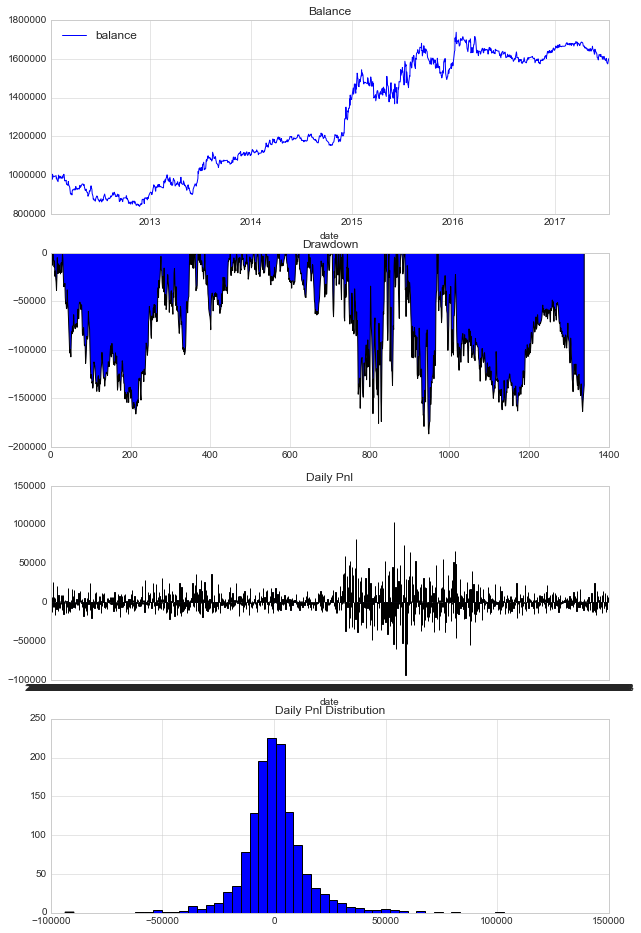

In [7]:
# 显示逐日回测结果
df = engine.showDailyResult()

2017-09-23 19:09:02.702000	计算回测结果
2017-09-23 19:09:02.824000	------------------------------
2017-09-23 19:09:02.824000	第一笔交易：	2012-01-11 10:18:00
2017-09-23 19:09:02.824000	最后一笔交易：	2017-07-14 15:00:00
2017-09-23 19:09:02.824000	总交易次数：	3,817.0
2017-09-23 19:09:02.824000	总盈亏：	601,026.05
2017-09-23 19:09:02.824000	最大回撤: 	-215,542.46
2017-09-23 19:09:02.824000	平均每笔盈利：	157.46
2017-09-23 19:09:02.824000	平均每笔滑点：	120.0
2017-09-23 19:09:02.824000	平均每笔佣金：	57.84
2017-09-23 19:09:02.824000	胜率		37.1%
2017-09-23 19:09:02.824000	盈利交易平均值	8,540.18
2017-09-23 19:09:02.824000	亏损交易平均值	-4,786.29
2017-09-23 19:09:02.824000	盈亏比：	1.78


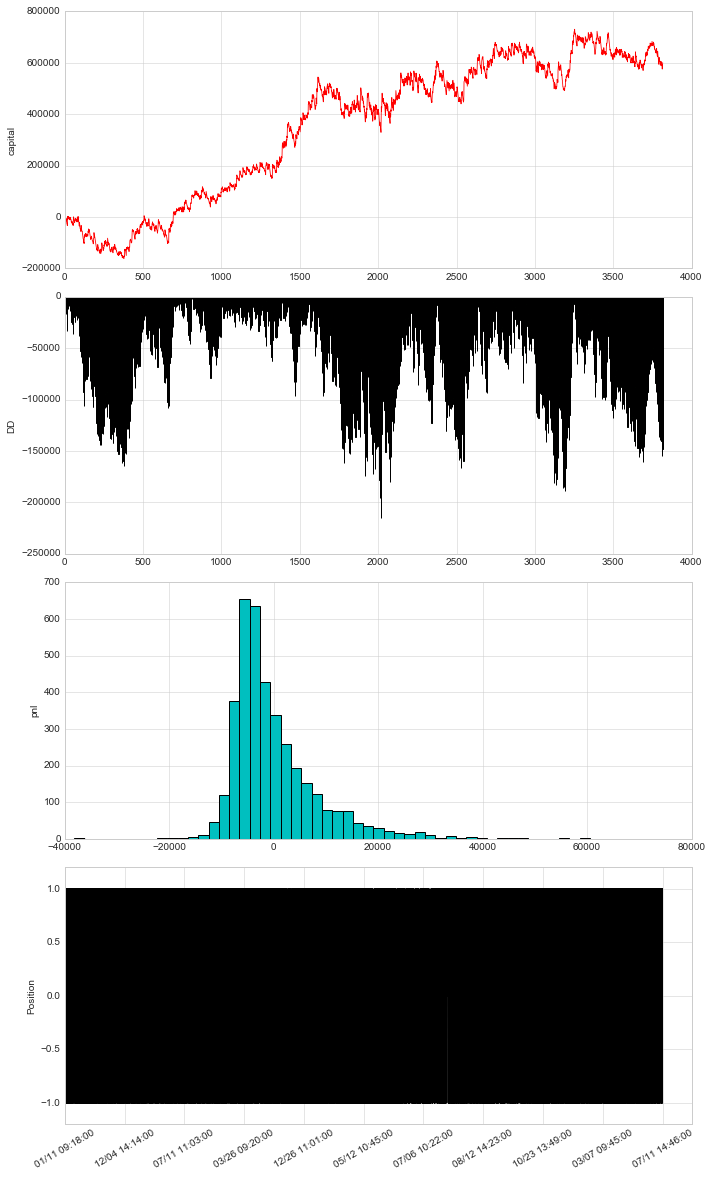

In [8]:
# 显示逐笔回测结果
engine.showBacktestingResult()

In [11]:
# 显示前10条成交记录
for i in range(10):
    d = engine.tradeDict[str(i+1)].__dict__
    print 'TradeID: %s, Time: %s, Direction: %s, Price: %s, Volume: %s' %(d['tradeID'], d['dt'], d['direction'], d['price'], d['volume'])

TradeID: 1, Time: 2012-01-11 09:18:00, Direction: 多, Price: 2464.4, Volume: 1
TradeID: 2, Time: 2012-01-11 10:18:00, Direction: 空, Price: 2448.8, Volume: 1
TradeID: 3, Time: 2012-01-11 10:19:00, Direction: 空, Price: 2448.4, Volume: 1
TradeID: 4, Time: 2012-01-11 14:21:00, Direction: 多, Price: 2456.2, Volume: 1
TradeID: 5, Time: 2012-01-11 14:22:00, Direction: 多, Price: 2455.6, Volume: 1
TradeID: 6, Time: 2012-01-11 14:57:00, Direction: 空, Price: 2444.0, Volume: 1
TradeID: 7, Time: 2012-01-11 14:58:00, Direction: 空, Price: 2445.8, Volume: 1
TradeID: 8, Time: 2012-01-12 09:51:00, Direction: 多, Price: 2452.8, Volume: 1
TradeID: 9, Time: 2012-01-12 09:52:00, Direction: 多, Price: 2452.0, Volume: 1
TradeID: 10, Time: 2012-01-12 10:31:00, Direction: 空, Price: 2455.2, Volume: 1


In [12]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('capital')            # 设置优化排序的目标是策略净盈利
setting.addParameter('atrLength', 12, 20, 2)    # 增加第一个优化参数atrLength，起始12，结束20，步进2
setting.addParameter('atrMa', 20, 30, 5)        # 增加第二个优化参数atrMa，起始20，结束30，步进5
setting.addParameter('rsiLength', 5)            # 增加一个固定数值的参数

# 执行多进程优化
import time
start = time.time()
engine.runParallelOptimization(AtrRsiStrategy, setting)
print u'耗时：%s' %(time.time()-start)

2017-09-23 19:22:56.071000	------------------------------
2017-09-23 19:22:56.071000	优化结果：
2017-09-23 19:22:56.071000	{'rsiLength': 5, 'atrMa': 20, 'atrLength': 20}: 812328.0084
2017-09-23 19:22:56.071000	{'rsiLength': 5, 'atrMa': 25, 'atrLength': 20}: 812328.0084
2017-09-23 19:22:56.071000	{'rsiLength': 5, 'atrMa': 30, 'atrLength': 20}: 812328.0084
2017-09-23 19:22:56.071000	{'rsiLength': 5, 'atrMa': 20, 'atrLength': 18}: 750899.3112
2017-09-23 19:22:56.071000	{'rsiLength': 5, 'atrMa': 25, 'atrLength': 18}: 750899.3112
2017-09-23 19:22:56.071000	{'rsiLength': 5, 'atrMa': 30, 'atrLength': 18}: 750899.3112
2017-09-23 19:22:56.071000	{'rsiLength': 5, 'atrMa': 20, 'atrLength': 16}: 640937.2914
2017-09-23 19:22:56.071000	{'rsiLength': 5, 'atrMa': 25, 'atrLength': 16}: 640937.2914
2017-09-23 19:22:56.071000	{'rsiLength': 5, 'atrMa': 30, 'atrLength': 16}: 640937.2914
2017-09-23 19:22:56.071000	{'rsiLength': 5, 'atrMa': 20, 'atrLength': 14}: 640663.1826
2017-09-23 19:22:56.071000	{'rsiLength'